In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([[3.87, 5.38],
                 [2.29, 3.45],
                 [5.17, 6.94],
                 [4.93, 7.1 ],
                 [4.  , 5.47],
                 [3.97, 5.31],
                 [6.77, 8.89],
                 [2.48, 4.08],
                 [2.85, 4.59],
                 [6.43, 8.52],
                 [6.99, 8.63],
                 [2.74, 4.29],
                 [2.07, 3.34],
                 [3.64, 5.48],
                 [5.66, 7.4 ],
                 [1.85, 3.3 ],
                 [4.73, 6.19],
                 [4.55, 6.46],
                 [6.4 , 8.65],
                 [2.14, 3.35]])

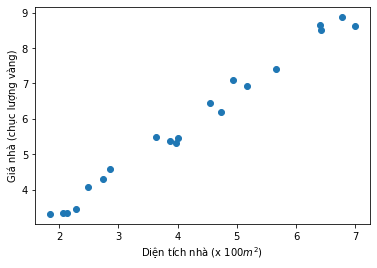

In [ ]:
m = data.shape[0]
X = data[:, 0]

# sử dụng 1: để tạo thành 1 vector (cột)
y = data[:, 1:]

# hàm np.c_ tương tự `numpy.concatenate`
X_b = np.c_[np.ones((m, 1)), X]

# plot data
plt.scatter(X, y)
plt.xlabel('Diện tích nhà (x 100$m^2$)')
plt.ylabel('Giá nhà (chục lượng vàng)')
plt.show()

In [ ]:
print(X_b.shape)
print(y.shape)

(20, 2)
(20, 1)


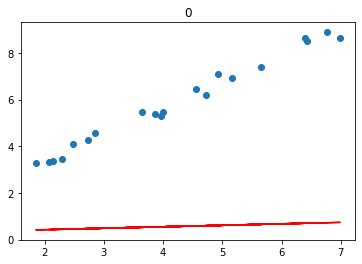

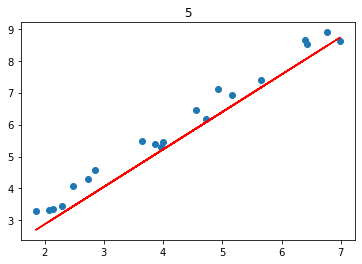

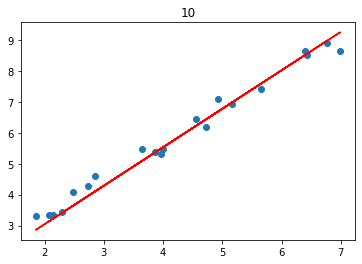

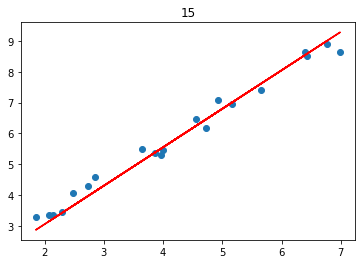

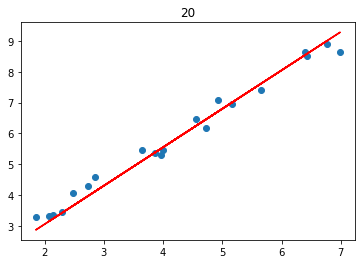

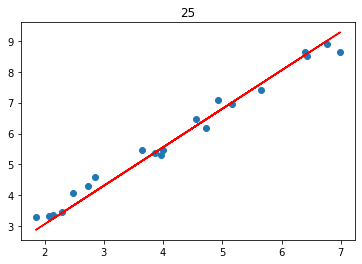

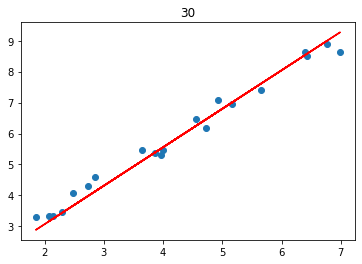

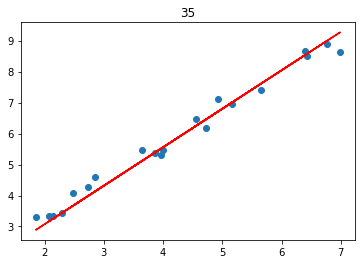

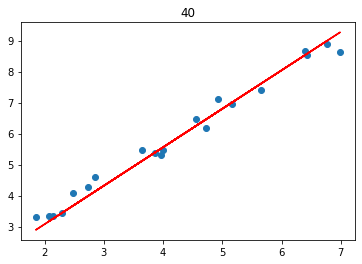

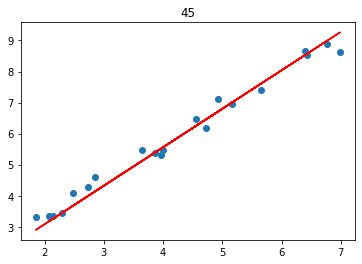

In [ ]:
def batch_gradient_descent():
    n_itertaions = 50
    learning_rate = 0.01
    
    # khởi tạo gía trị tham số 
    thetas = np.random.randn(2, 1)
    thetas_path = [thetas]
    losses = []
    
    for i in range(n_itertaions):
        # tinh output
        # có thể sử dụng np.dot(X_b, thetas)
        # X_b (20 , 2) ; thetas (2, 1) 
        # ---> output (20 , 1) (same y)
        output = X_b.dot(thetas)
        
        # tính loss 
        loss = (output - y)**2
        
        # tính đạo hàm cho loss 
        loss_grd = 2*(output - y) / m
        
        # tính đạo hàm cho các tham số 
        # X_b.T (2, 20); loss_grd (20, 1)
        # ---> np.dot(X_b.T, loss_grd) -> (2, 1) (thetas)
        gradients = X_b.T.dot(loss_grd)
        
        # cập nhật tham số 
        thetas = thetas - learning_rate*gradients
        thetas_path.append(thetas)
        
        mean_loss = np.sum(loss) / m
        losses.append(mean_loss)

        if i % 5 == 0:
          # plt.scatter: vẽ biểu đồ giá trị phân tán X, y
          plt.scatter(X, y)

          # lấy giá trị thetas cuối cùng (-1)
          data_y = X*thetas_path[-1][1]+ thetas_path[-1][0]
          plt.plot(X,data_y, color="r")
          plt.title(i)
          plt.show()
          plt.close()
        
    return thetas_path, losses 

bgd_thetas, losses = batch_gradient_descent()

In [ ]:
# Ket qua
bgd_thetas[-1]

array([[0.60926921],
       [1.23800736]])